In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
 )

Found 3042 files belonging to 3 classes.


In [6]:
class_names=dataset.class_names
class_names

['Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [7]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [9]:
pip install opencv-python


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.6 MB 1.3 MB/s eta 0:00:30
   ---------------------------------------- 0.2/38.6 MB 1.6 MB/s eta 0:00:25
   ---------------------------------------- 0.3/38.6 MB 1.7 MB/s eta 0:00:23
   ---------------------------------------- 0.4/38.6 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.5/38.6 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.6/38.6 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.6/38.6 MB 1.8 MB/s eta 0:00:21
    --------------------------------------- 0.7/38.6 MB 1.8 MB/s eta 0:00:21
    --------------------------------------- 0.8/38.6 MB 1.8 MB/s eta 0:00:22
    --------------------------------------- 0.9/38.6 MB 1.8 MB/s eta 0:00:21
    --------

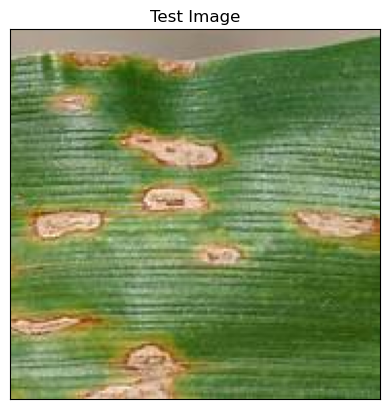

In [26]:
#Test Image Visualization
import cv2
image_path = 'th.jpeg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [27]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [28]:
print(predictions)

[[9.9402145e-02 9.0059787e-01 4.0587773e-09]]


In [29]:
result_index = np.argmax(predictions) #Return index of max element
confidence_score = np.max(predictions)
print(result_index)
print(confidence_score)

1
0.9005979


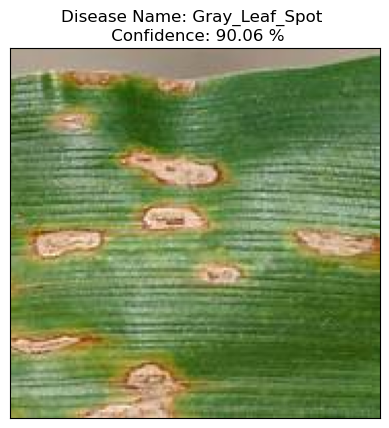

In [30]:
# Displaying the disease prediction
model_prediction = class_names[result_index]
plt.imshow(img)

plt.title(f"Disease Name: {model_prediction} \n Confidence: {round(confidence_score*100,2)} %")
plt.xticks([])
plt.yticks([])
plt.show()